In [1]:
import matplotlib.pyplot as plt
import cantera as ct
from cantera_practice import reactors

In [2]:
model = ct.Solution("data/webb_cyclopentane.yaml")

In [3]:
pres = 1.1 * ct.one_atm  # in atm.
conc0 = {"C5H8(522)": 0.005, "O2(6)": 0.0375, "N2": 0.9575}

tau = 4  # s
vol = 1 * (1e-2) ** 3  # m3

In [4]:
# Define all the temperatures at which we will run simulations. These should overlap
# with the values reported in the paper as much as possible
temps = [600, 700, 750, 775, 800, 825, 850, 900, 1000]

# Create a SolutionArray to store values for the above points
solns = ct.SolutionArray(model)

In [5]:
conc = conc0

for temp in temps:
    print(f"Starting simulation at T={temp} K")
    reactor = reactors.jsr(model=model, temp=temp, pres=pres, tau=tau, vol=vol, conc=conc)
    conc = reactor.thermo.X
    solns.append(reactor.thermo.state)

Starting simulation at T=600 K
Starting simulation at T=700 K
Starting simulation at T=750 K
Starting simulation at T=775 K
Starting simulation at T=800 K
Starting simulation at T=825 K
Starting simulation at T=850 K
Starting simulation at T=900 K
Starting simulation at T=1000 K


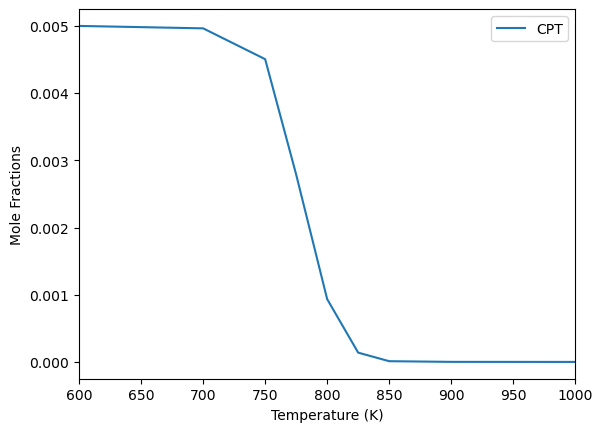

In [6]:
plt.figure()
plt.plot(
    solns.T, solns("C5H8(522)").X, color="C0", label="CPT"
)

plt.xlabel("Temperature (K)")
plt.ylabel(r"Mole Fractions")

plt.xlim([600, 1000])
plt.legend(loc=1)